In [17]:
# Add extra packages (not included in TrixiCUDA.jl project.toml file)
import Pkg
Pkg.add("Plots")
Pkg.add("BenchmarkTools")

   Resolving package versions...
  No Changes to `C:\Users\huiyu\.julia\dev\TrixiCUDA.jl\Project.toml`
  No Changes to `C:\Users\huiyu\.julia\dev\TrixiCUDA.jl\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\huiyu\.julia\dev\TrixiCUDA.jl\Project.toml`
  No Changes to `C:\Users\huiyu\.julia\dev\TrixiCUDA.jl\Manifest.toml`


In [2]:
# Run benchmarks
include("advection_basic_1d.jl") # warm up, including the first compile time
include("advection_basic_1d.jl") # this is the real run time

advec_1d_cpu = cpu_trial
advec_1d_gpu = gpu_trial

include("advection_basic_2d.jl") # warm up
include("advection_basic_2d.jl")

advec_2d_cpu = cpu_trial
advec_2d_gpu = gpu_trial

include("advection_basic_3d.jl") # warm up
include("advection_basic_3d.jl") 

advec_3d_cpu = cpu_trial
advec_3d_gpu = gpu_trial

┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_1d.jl:55
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_1d.jl:59
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_1d.jl:55
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_1d.jl:59
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_2d.jl:54
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_2d.jl:58
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_2d.jl:54
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\advection_basic_2d.jl:58
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\Trix

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  210.600 μs …  17.160 ms  ┊ GC (min … max): 0.00% … 41.39%
 Time  (median):     225.200 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   242.002 μs ± 176.782 μs  ┊ GC (mean ± σ):  0.29% ±  0.41%

    ▃█▇▅                                                         
  ▁▄████▇▄▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▁▁▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  211 μs           Histogram: frequency by time          379 μs <

 Memory estimate: 7.55 KiB, allocs estimate: 268.

In [3]:
# Run benchmarks
include("euler_ec_1d.jl") # warm up, including the first compile time
include("euler_ec_1d.jl") # this is the real run time

eulerec_1d_cpu = cpu_trial
eulerec_1d_gpu = gpu_trial

include("euler_ec_2d.jl") # warm up 
include("euler_ec_2d.jl")

eulerec_2d_cpu = cpu_trial
eulerec_2d_gpu = gpu_trial

include("euler_ec_3d.jl") # warm up
include("euler_ec_3d.jl")

eulerec_3d_cpu = cpu_trial
eulerec_3d_gpu = gpu_trial

┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_1d.jl:57
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_1d.jl:61
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_1d.jl:57
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_1d.jl:61
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_2d.jl:60
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_2d.jl:64
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_2d.jl:60
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_2d.jl:64
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_ec_3d.jl:57
┌ Info: Benchmarkin

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  133.000 μs …  1.988 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     135.700 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   150.660 μs ± 55.708 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▆▃▁▁▁▁      ▁▁▃▃▂▁▁▁▁▂▂                                     ▁
  ████████████▇████████████▇▆▆▆▆▆▆▅▄▅▆▅▅▆▅▅▄▄▅▄▅▄▅▅▅▅▅▄▅▄▁▄▃▄▄ █
  133 μs        Histogram: log(frequency) by time       319 μs <

 Memory estimate: 7.41 KiB, allocs estimate: 268.

In [5]:
# Run benchmarks
include("euler_shock_1d.jl") # warm up, including the first compile time
include("euler_shock_1d.jl") # this is the real run time

eulersk_1d_cpu = cpu_trial
eulersk_1d_gpu = gpu_trial

include("euler_shock_2d.jl") # warm up
include("euler_shock_2d.jl") 

eulersk_2d_cpu = cpu_trial
eulersk_2d_gpu = gpu_trial

include("euler_shock_3d.jl") # warm up
include("euler_shock_3d.jl")

eulersk_3d_cpu = cpu_trial
eulersk_3d_gpu = gpu_trial

┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_1d.jl:67
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_1d.jl:71
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_1d.jl:67
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_1d.jl:71
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_2d.jl:67
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_2d.jl:71
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_2d.jl:67
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_2d.jl:71
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\euler_shock_3

BenchmarkTools.Trial: 2822 samples with 1 evaluation per sample.
 Range (min … max):  1.460 ms …   7.209 ms  ┊ GC (min … max): 0.00% … 72.54%
 Time  (median):     1.690 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.764 ms ± 430.006 μs  ┊ GC (mean ± σ):  1.73% ±  5.62%

     ▁▃▇█▇▇▆▆▄▂▃                                               
  ▂▃▅████████████▇█▇▇▅▆▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▂▂▂▁▁▁▁▂▁▁▁▁▁▂▁▂ ▄
  1.46 ms         Histogram: frequency by time        2.79 ms <

 Memory estimate: 649.27 KiB, allocs estimate: 342.

In [7]:
# Run benchmarks
include("mhd_ec_1d.jl") # warm up, including the first compile time
include("mhd_ec_1d.jl") # this is the real run time

mhdec_1d_cpu = cpu_trial
mhdec_1d_gpu = gpu_trial

include("mhd_ec_2d.jl") # warm up
include("mhd_ec_2d.jl")

mhdec_2d_cpu = cpu_trial
mhdec_2d_gpu = gpu_trial

include("mhd_ec_3d.jl") # warm up
include("mhd_ec_3d.jl")

mhdec_3d_cpu = cpu_trial
mhdec_3d_gpu = gpu_trial

┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_1d.jl:58
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_1d.jl:62
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_1d.jl:58
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_1d.jl:62
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_2d.jl:59
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_2d.jl:63
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_2d.jl:59
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_2d.jl:63
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\mhd_ec_3d.jl:59
┌ Info: Benchmarking rhs! on GPU
└ @ 

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):   82.600 μs …  48.242 ms  ┊ GC (min … max): 0.00% … 33.42%
 Time  (median):      88.000 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   109.420 μs ± 482.980 μs  ┊ GC (mean ± σ):  1.47% ±  0.33%

  ███▅▂▂▁▁▁▂▄▄▅▄▃▃▂▃▃▃▃▄▄▃▃▃▂▂▁▁▃▂▂▁                            ▂
  ██████████████████████████████████▇▇▇▇▇▆▇▅▆▆▅▆▅▅▅▄▁▅▆▅▆▆▆▆▁▅▆ █
  82.6 μs       Histogram: log(frequency) by time        224 μs <

 Memory estimate: 8.77 KiB, allocs estimate: 317.

In [8]:
# Run benchmarks
include("hypdiff_nonperiodic_1d.jl") # warm up, including the first compile time
include("hypdiff_nonperiodic_1d.jl") # this is the real run time

hypdiff_1d_cpu = cpu_trial
hypdiff_1d_gpu = gpu_trial

include("hypdiff_nonperiodic_2d.jl") # warm up
include("hypdiff_nonperiodic_2d.jl")

hypdiff_2d_cpu = cpu_trial
hypdiff_2d_gpu = gpu_trial

include("hypdiff_nonperiodic_3d.jl") # warm up
include("hypdiff_nonperiodic_3d.jl")

hypdiff_3d_cpu = cpu_trial
hypdiff_3d_gpu = gpu_trial

┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_1d.jl:61
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_1d.jl:65
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_1d.jl:61
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_1d.jl:65
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_2d.jl:64
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_2d.jl:68
┌ Info: Benchmarking rhs! on CPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_2d.jl:64
┌ Info: Benchmarking rhs! on GPU
└ @ Main c:\Users\huiyu\.julia\dev\TrixiCUDA.jl\benchmark\hypdiff_nonperiodic_2d.jl:68
┌ Info: Benchmarking rhs! on CPU
└ @ Mai

BenchmarkTools.Trial: 10000 samples with 1 evaluation per sample.
 Range (min … max):  229.700 μs …  83.787 ms  ┊ GC (min … max): 0.00% … 30.81%
 Time  (median):     315.300 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   379.157 μs ± 850.751 μs  ┊ GC (mean ± σ):  0.68% ±  0.31%

    ▅█▆▃                                                         
  ▂▅█████▆▅▅▅▅▆▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  230 μs           Histogram: frequency by time         1.03 ms <

 Memory estimate: 18.47 KiB, allocs estimate: 651.

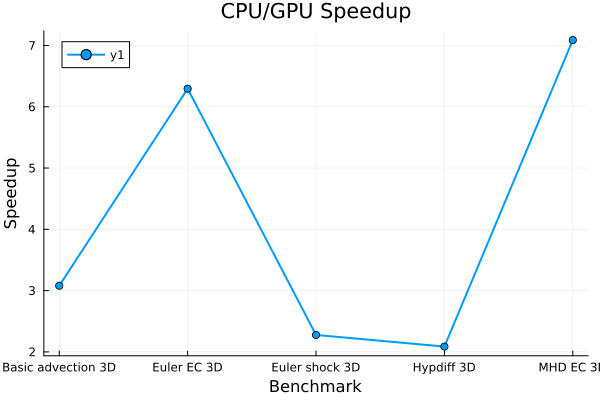

In [24]:
using Plots, Statistics

names = ["Advection 3D", "Euler EC 3D", "Euler shock 3D",
    "MHD EC 3D", "Hypdiff 3D"]

cpu_trials = [advec_3d_cpu, eulerec_3d_cpu, eulersk_3d_cpu,
    mhdec_3d_cpu, hypdiff_3d_cpu]
gpu_trials = [advec_3d_gpu, eulerec_3d_gpu, eulersk_3d_gpu,
    mhdec_3d_gpu, hypdiff_3d_gpu]

cpu_meds = [median(t.times) / 1e6 for t in cpu_trials]
gpu_meds = [median(t.times) / 1e6 for t in gpu_trials]

speedups = cpu_meds ./ gpu_meds

plot(names, speedups, seriestype=:line, marker=:circle, lw=2,
    xlabel="Benchmark", ylabel="Speedup", title="CPU/GPU Speedup")

